<a href="https://colab.research.google.com/github/adityasingh0912/Solving-maze/blob/main/Solvethemaze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Episode 500: Total Reward = -151.6999999999951, Learning Rate: 0.09950124543172269, Epsilon: 0.9512270462715811
Episode 1000: Total Reward = -16.900000000000112, Learning Rate: 0.09900497842463928, Epsilon: 0.9048328935585562
Episode 1500: Total Reward = -3.9999999999999662, Learning Rate: 0.0985111865719244, Epsilon: 0.8607015207090729
Episode 2000: Total Reward = -14.100000000000072, Learning Rate: 0.09801985752863282, Epsilon: 0.8187225652655491
Episode 2500: Total Reward = -14.300000000000075, Learning Rate: 0.09753097901138995, Epsilon: 0.7787910474734399
Episode 3000: Total Reward = -3.8999999999999666, Learning Rate: 0.09704453879808499, Epsilon: 0.74080710775091
Episode 3500: Total Reward = -0.39999999999997904, Learning Rate: 0.09656052472756582, Epsilon: 0.7046757569628911
Episode 4000: Total Reward = -5.8999999999999595, Learning Rate: 0.09607892469933461, Epsilon: 0.6703066388750015
Episode 4500: Total Reward = -2.1999999999999726, Learning Rate: 0.0955997266732451, Epsilon

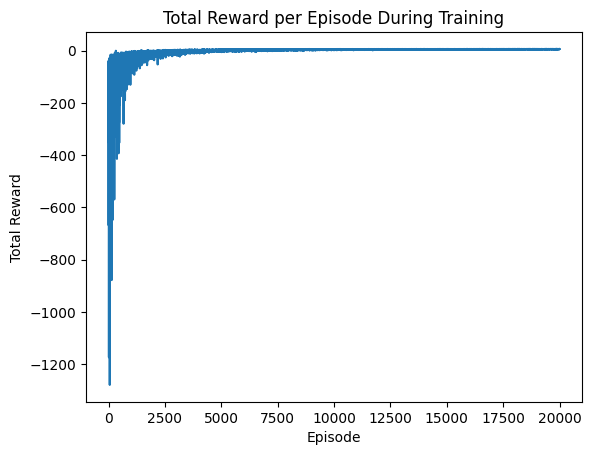


Optimal Path:
right
right
right
right
right
down
down
down
down
down
down
right
right
right
right
right
right
right
right
right
down
down
down
down
down
down
right
down
down
down
down
down
right
right


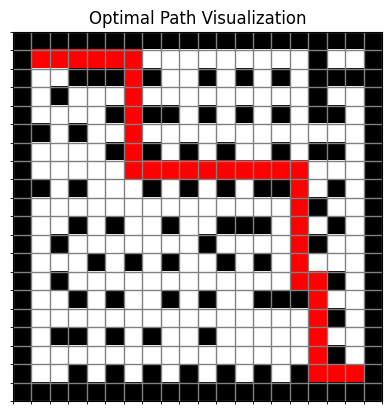

34


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class MazeEnvironment:
    def __init__(self, maze):
        self.maze = maze
        self.rows = len(maze)
        self.cols = len(maze[0])
        self.agent_pos = self.find_char('A')
        self.goal_pos = self.find_char('G')
        self.actions = ['up', 'down', 'left', 'right']
        self.visited = set()  # For rendering during testing
        self.visited.add(self.agent_pos)

    def find_char(self, char):
        for r in range(self.rows):
            for c in range(self.cols):
                if self.maze[r][c] == char:
                    return (r, c)
        return None

    def is_valid_state(self, state):
        r, c = state
        return 0 <= r < self.rows and 0 <= c < self.cols and self.maze[r][c] != '#'

    def get_state(self):
        return self.agent_pos

    def reset(self):
        self.agent_pos = self.find_char('A')
        self.visited = set()  # Reset visited on reset
        self.visited.add(self.agent_pos)  # Add initial position
        return self.agent_pos

    def step(self, action):
        r, c = self.agent_pos
        if action == 'up':
            new_pos = (r - 1, c)
        elif action == 'down':
            new_pos = (r + 1, c)
        elif action == 'left':
            new_pos = (r, c - 1)
        elif action == 'right':
            new_pos = (r, c + 1)
        else:
            raise ValueError("Invalid action")

        if self.is_valid_state(new_pos):
            self.agent_pos = new_pos
            self.visited.add(new_pos)  # For rendering during testing

        if self.agent_pos == self.goal_pos:
            reward = 10
            done = True
        else:
            reward = -0.1
            done = False

        return self.agent_pos, reward, done

    def render(self):
        for r in range(self.rows):
            row_str = ""
            for c in range(self.cols):
                if (r, c) == self.agent_pos:
                    row_str += "A"
                elif (r, c) in self.visited:
                    row_str += "."
                else:
                    row_str += self.maze[r][c]
            print(row_str)

    def simulate_step(self, state, action):
        """Simulates a step without modifying the actual environment."""
        r, c = state
        if action == 'up':
            new_pos = (r - 1, c)
        elif action == 'down':
            new_pos = (r + 1, c)
        elif action == 'left':
            new_pos = (r, c - 1)
        elif action == 'right':
            new_pos = (r, c + 1)
        else:
            raise ValueError("Invalid action")

        if self.is_valid_state(new_pos):
            return new_pos, 0, new_pos == self.goal_pos
        return state, -0.1, False

class QLearningAgent:
    def __init__(self, env, learning_rate=0.2, discount_factor=0.9, epsilon=1.0, learning_rate_decay=0.99999):
        self.env = env
        self.q_table = np.zeros((env.rows, env.cols, len(env.actions)))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.learning_rate_decay = learning_rate_decay  # Keep this, but make it slower
        self.optimal_path = []

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.actions)
        else:
            return self.env.actions[np.argmax(self.q_table[state[0], state[1]])]

    def update_q_table(self, state, action, reward, next_state):
        action_index = self.env.actions.index(action)
        old_value = self.q_table[state[0], state[1], action_index]
        next_max = np.max(self.q_table[next_state[0], next_state[1]])
        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max)
        self.q_table[state[0], state[1], action_index] = new_value

    def decrease_epsilon(self):
        if self.epsilon > 0.01:
            self.epsilon *= 0.9999 # Slower epsilon decay

    def decrease_learning_rate(self):
        if self.learning_rate > 0.001:
            self.learning_rate *= self.learning_rate_decay

    def get_optimal_path(self):
        path = []
        state = self.env.find_char('A')
        goal_state = self.env.find_char('G')
        max_steps = self.env.rows * self.env.cols
        steps = 0

        while state != goal_state and steps < max_steps:
            best_action_index = np.argmax(self.q_table[state[0], state[1]])
            best_action = self.env.actions[best_action_index]
            next_state, _, _ = self.env.simulate_step(state, best_action)  # Get next state

            if next_state != state:
                path.append(best_action)
                state = next_state

            steps += 1

        self.optimal_path = path
        return path

def train(agent, episodes=20000): #Increased episodes
    rewards_per_episode = []
    for episode in range(episodes):
        state = agent.env.reset()
        done = False
        total_reward = 0

        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = agent.env.step(action)
            agent.update_q_table(state, action, reward, next_state)
            state = next_state
            total_reward += reward

        agent.decrease_learning_rate()
        agent.decrease_epsilon()
        rewards_per_episode.append(total_reward)

        if (episode + 1) % 500 == 0:
            print(
                f"Episode {episode + 1}: Total Reward = {total_reward}, Learning Rate: {agent.learning_rate}, Epsilon: {agent.epsilon}"
            )

    return rewards_per_episode

def visualize_path(maze, path, env):
    """Visualizes the maze and the optimal path using matplotlib."""

    maze_array = np.zeros((len(maze), len(maze[0])))
    for r in range(len(maze)):
        for c in range(len(maze[0])):
            if maze[r][c] == '#':
                maze_array[r, c] = 0
            elif maze[r][c] == ' ':
                maze_array[r, c] = 1
            elif maze[r][c] == 'A':
                maze_array[r, c] = 2
            elif maze[r][c] == 'G':
                maze_array[r, c] = 3

    # Start at the initial position
    current_state = env.find_char('A')
    maze_array[current_state[0], current_state[1]] = 4  # Mark the start

    # Follow the path of *actions*, updating the maze_array
    for action in path:
        next_state, _, _ = env.simulate_step(current_state, action) # Use simulate_step from env
        current_state = next_state
        maze_array[current_state[0], current_state[1]] = 4 # Mark visited

    cmap = mcolors.ListedColormap(["black", "white", "blue", "green", "red"])
    bounds = [0, 1, 2, 3, 4, 5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(maze_array, cmap=cmap, norm=norm)

    ax.set_xticks(np.arange(-0.5, len(maze[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(maze), 1), minor=True)
    ax.grid(which="minor", color="gray", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Optimal Path Visualization")
    plt.show()

maze = [
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
    ['#', 'A', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', '#'],
    ['#', ' ', ' ', '#', '#', '#', ' ', '#', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' #', '#', '#'],
    ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', '#', ' ', '#', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', ' ', '#'],
    ['#', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', '#', ' ', '#', '#', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
    ['#', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', ' ', ' ', '#', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', '#'],
    ['#', ' ', ' ', '#', ' ', '#', ' ', ' ', '#', ' ', ' ', '#', '#', '#', ' ', ' ', ' ', '#', ' ', '#'],
    ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', '#'],
    ['#', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#'],
    ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#'],
    ['#', ' ', ' ', '#', ' ', '#', ' ', ' ', '#', ' ', '#', ' ', ' ', '#', '#', '#', ' ', ' ', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#'],
    ['#', ' ', '#', '#', ' ', '#', ' ', '#', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#'],
    ['#', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', 'G', '#'],
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']
]


env = MazeEnvironment(maze)
agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.9, epsilon=1.0, learning_rate_decay=0.99999)  # Adjusted parameters
rewards = train(agent, episodes=20000)   # Increased episodes significantly

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode During Training')
plt.show()
count = 0
optimal_path = agent.get_optimal_path()

if optimal_path:
    print("\nOptimal Path:")
    for step in optimal_path:
        print(step)
        count+=1
    visualize_path(maze, optimal_path, env)
else:
    print("\nNo optimal path found.")
show_test_output = False  # Set to False to hide output
print(count)
if show_test_output:
    print("\nTrained Agent Test (Following Optimal Path):")
    state = env.reset()
    done = False
    # env.render()  # You might want to uncomment this if you want to see the initial state
    max_test_steps = env.rows * env.cols
    test_steps_taken = 0
    count = 0
    if optimal_path:
        for action in optimal_path:
            print(f"Action: {action}")
            state, _, done = env.step(action)
            count+=1
            env.render()
            test_steps_taken += 1
            if done:
                print("Reached the Goal!")
                print(count)
                break
    else:
        while not done and test_steps_taken < max_test_steps:
            action = agent.choose_action(state)
            print(f"Action: {action}")
            state, _, done = env.step(action)
            env.render()
            test_steps_taken += 1
            if done:
                print("Reached the Goal!")
                break